![logo](../Data/JFM-notebooks-logo.jpg)

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
plt.rcParams.update({'font.size': 18})
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r"\usepackage{amsmath}")
plt.rc('font', family='serif')

In [4]:
# Loading datasets
ds_s1 = xr.open_dataset('../Data/solver_lowpass_x_y_omega_2_Nint_1_strat_1_T_40.nc')
ds_s3 = xr.open_dataset('../Data/solver_lowpass_x_y_omega_2_Nint_1_strat_3_T_40.nc')

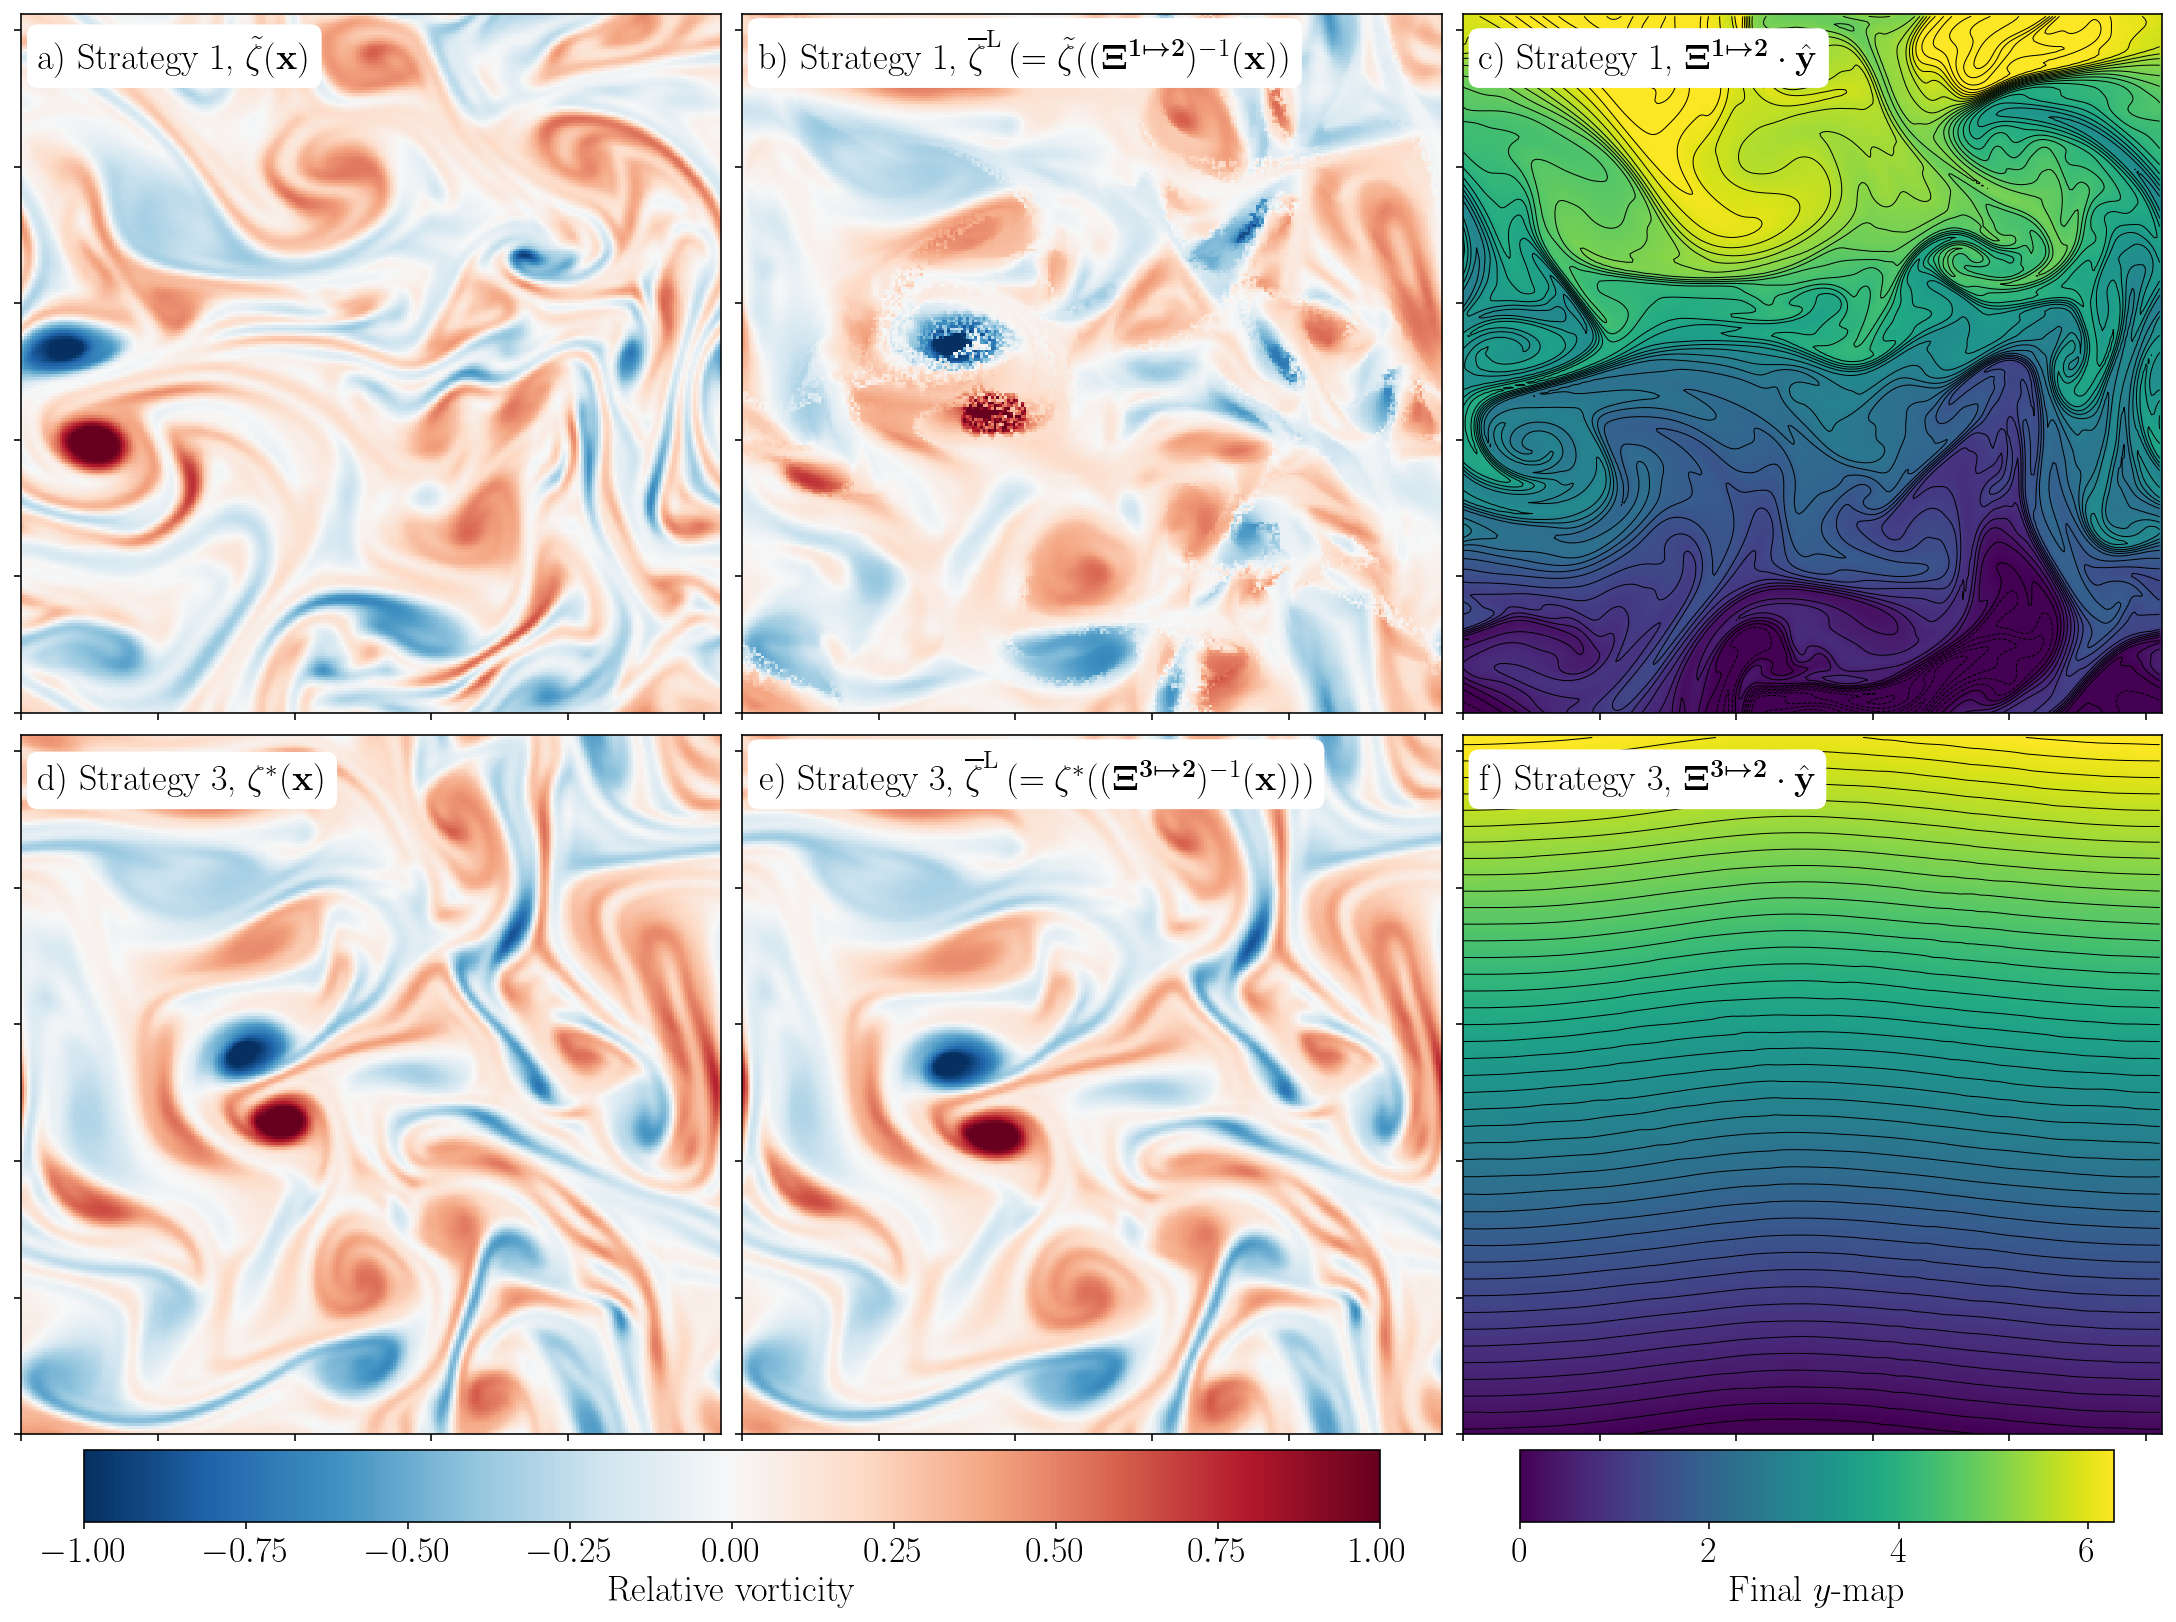

In [5]:
# Initialising figure
fig, axes = plt.subplots(2,3,figsize = (15,10),constrained_layout=True)

# Plotting
vmin = -1
vmax = 1
p0=axes[0,0].pcolormesh(ds_s1.z_LM_at_end,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
axes[1,0].pcolormesh(ds_s3.z_LM_at_mid,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
axes[0,1].pcolormesh(ds_s1.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
p1 = axes[0,2].pcolormesh(ds_s1.Xi12_y,vmin = 0, vmax = 2*np.pi,cmap = 'viridis')
axes[0,2].contour(ds_s1.Xi12_y,levels=50,linewidths=0.5,colors='k')
axes[1,1].pcolormesh(ds_s3.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
axes[1,2].pcolormesh(ds_s3.Xi32_y,vmin = 0, vmax = 2*np.pi,cmap = 'viridis')
axes[1,2].contour(ds_s3.Xi32_y,levels=50,linewidths=0.5,colors='k')

textposx = 6
textposy = 236
bbox=dict(facecolor='white', edgecolor='none', boxstyle='round')
axes[0,0].text(textposx,textposy,r'a) Strategy 1, $\tilde{\zeta}(\mathbf{x})$ ',bbox=bbox)
axes[0,1].text(textposx,textposy,r'b) Strategy 1, $\overline{\zeta}^\mathrm{L}\,(= \tilde{\zeta}((\boldsymbol{\Xi^{1 \mapsto 2}})^{-1}(\mathbf{x}))$ ',bbox=bbox)
axes[0,2].text(textposx,textposy,r'c) Strategy 1, $\boldsymbol{\Xi^{1 \mapsto 2}}\cdot \hat{\mathbf{y}}$',bbox=bbox)
axes[1,0].text(textposx,textposy,r'd) Strategy 3, $\zeta^*(\mathbf{x})$',bbox=bbox)
axes[1,1].text(textposx,textposy,r'e) Strategy 3, $\overline{\zeta}^\mathrm{L}\,(= \zeta^*((\boldsymbol{\Xi^{3 \mapsto 2}})^{-1}(\mathbf{x})))$',bbox=bbox)
axes[1,2].text(textposx,textposy,r'f) Strategy 3, $\boldsymbol{\Xi^{3 \mapsto 2}}\cdot \hat{\mathbf{y}}$',bbox=bbox)

cbar_ax1 = fig.add_axes([0.035, -0.052, 0.6, 0.05])
cbar_ax2 = fig.add_axes([0.7, -0.052, 0.275, 0.05])
fig.colorbar(p0, cax=cbar_ax1, orientation = 'horizontal',label='Relative vorticity')
fig.colorbar(p1, cax=cbar_ax2, orientation = 'horizontal',label=r'Final $y$-map')

# Formatting
[axes[i,j].axes.set_xticklabels([]) for i in range(2) for j in range(3)];
[axes[i,j].axes.set_yticklabels([]) for i in range(2) for j in range(3)];
[axes[i,j].set_aspect('equal') for i in range(2) for j in range(3)];

fig.savefig('Figure-4.png',dpi=200,bbox_inches='tight')

Comparison of calculation of $\overline{\zeta}^\mathrm{L}$ using strategies 1 and 3 with $T=20$. a) $\tilde{\zeta}$, found using strategy 1, b) $\overline{\zeta}^\mathrm{L}$, found by remapping $\tilde{\zeta}$ using $\bm{\Xi}^{1 \mapsto 2}$, and c) the $y$ component of $\bm{\Xi}^{1 \mapsto 2}$. d) $\zeta^*$, found using strategy 3, e) $\overline{\zeta}^\mathrm{L}$, found by remapping $\zeta^*$ using $\bm{\Xi}^{1 \mapsto 3}$, and f) the $y$ component of $\bm{\Xi}^{1 \mapsto 3}$. $x$ and $y$ axes correspond to $x$ and $y$ coordinates of the full domain.

More data variables are available in the xarray dataset:

In [6]:
ds_s3

<xarray.Dataset>
Dimensions:         (y: 256, x: 256)
Coordinates:
  * x               (x) float64 0.0 0.02454 0.04909 0.07363 ... 6.21 6.234 6.259
  * y               (y) float64 0.0 0.02454 0.04909 0.07363 ... 6.21 6.234 6.259
    t               float64 ...
Data variables:
    z_inst          (y, x) float64 ...
    z_EM            (y, x) float64 ...
    z_inst_at_end   (y, x) float64 ...
    z_LM_at_mid     (y, x) float64 ...
    z_LM_at_end     (y, x) float64 ...
    Xi31_x          (y, x) float64 ...
    Xi31_y          (y, x) float64 ...
    z_inst_at_mean  (y, x) float64 ...
    z_LM_at_mean    (y, x) float64 ...
    Xi32_x          (y, x) float64 ...
    Xi32_y          (y, x) float64 ...
    timestep        int32 ...
Attributes:
    description:  SW GLM solver outputs